In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,validation_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import joblib

In [2]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\PROCESS_DATASET\crop_recommendation_processed.csv")

In [3]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [11]:
len(np.unique(ytrain))

22

In [29]:
model=Sequential([
    Input(shape=(7,)),
    Dense(units=64,kernel_regularizer=l2(0.1)),
    PReLU(),
    Dense(units=22,activation='softmax')
])

In [30]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
stop=EarlyStopping(
    monitor='val_loss',
    verbose=1,
    min_delta=0.00001,
    restore_best_weights=True,
    patience=10
)

In [32]:
model_history=model.fit(xtrain,ytrain,epochs=100,batch_size=30,validation_data=(xtest,ytest),callbacks=stop)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1330 - loss: 3.9300 - val_accuracy: 0.4318 - val_loss: 3.2926
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5154 - loss: 3.1108 - val_accuracy: 0.6500 - val_loss: 2.7534
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 2.6277 - val_accuracy: 0.7114 - val_loss: 2.3688
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 2.2564 - val_accuracy: 0.7568 - val_loss: 2.0761
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8095 - loss: 1.9789 - val_accuracy: 0.8114 - val_loss: 1.8622
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 1.7917 - val_accuracy: 0.8273 - val_loss: 1.6998
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 1.6419 - val_accuracy: 0.8409 - val_loss: 1.5773
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 1.5247 - val_accuracy: 0.8523 - v

In [33]:
print("TRAINING ACCURACY: ",model.evaluate(xtrain,ytrain)[1]*100)
print("TESTING ACCURACY: ",model.evaluate(xtest,ytest)[1]*100)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9755 - loss: 0.3573
TRAINING ACCURACY:  98.1249988079071
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.4089 
TESTING ACCURACY:  95.6818163394928


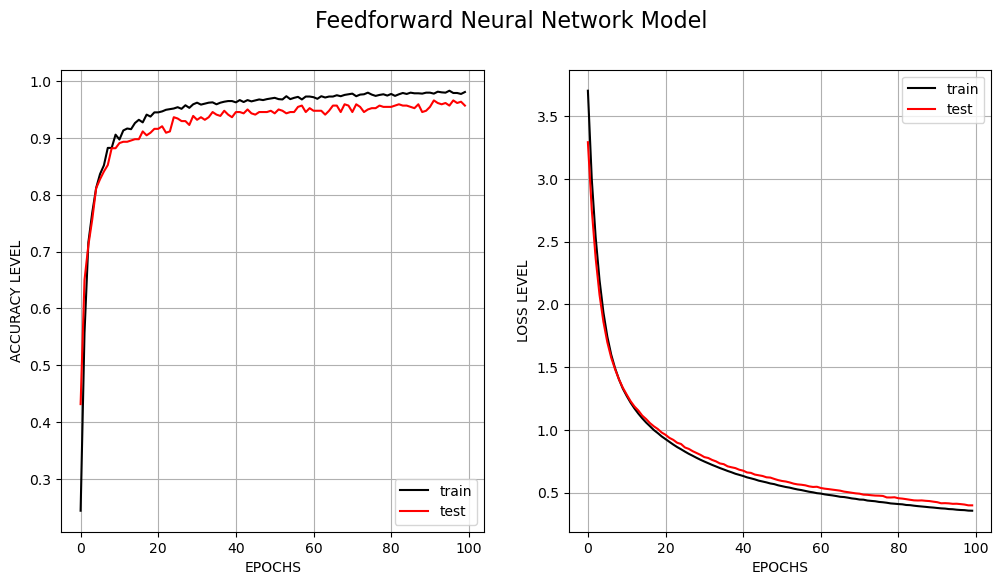

In [36]:
plt.figure(figsize=(12,6))
plt.suptitle("Feedforward Neural Network Model",fontsize=16)
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'],color='Black')
plt.plot(model_history.history['val_accuracy'],color='Red')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY LEVEL")
plt.grid()
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(model_history.history['loss'],color='Black')
plt.plot(model_history.history['val_loss'],color='Red')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS LEVEL")
plt.grid()
plt.legend(['train','test'])
plt.show()

In [44]:
ypr=model.predict(xtest)
ypred=np.argmax(ypr,axis=1)
ypred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 16,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  6,  0,  4,  9, 13, 14,  2, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [57]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\DATASET\Crop_recommendation.csv")

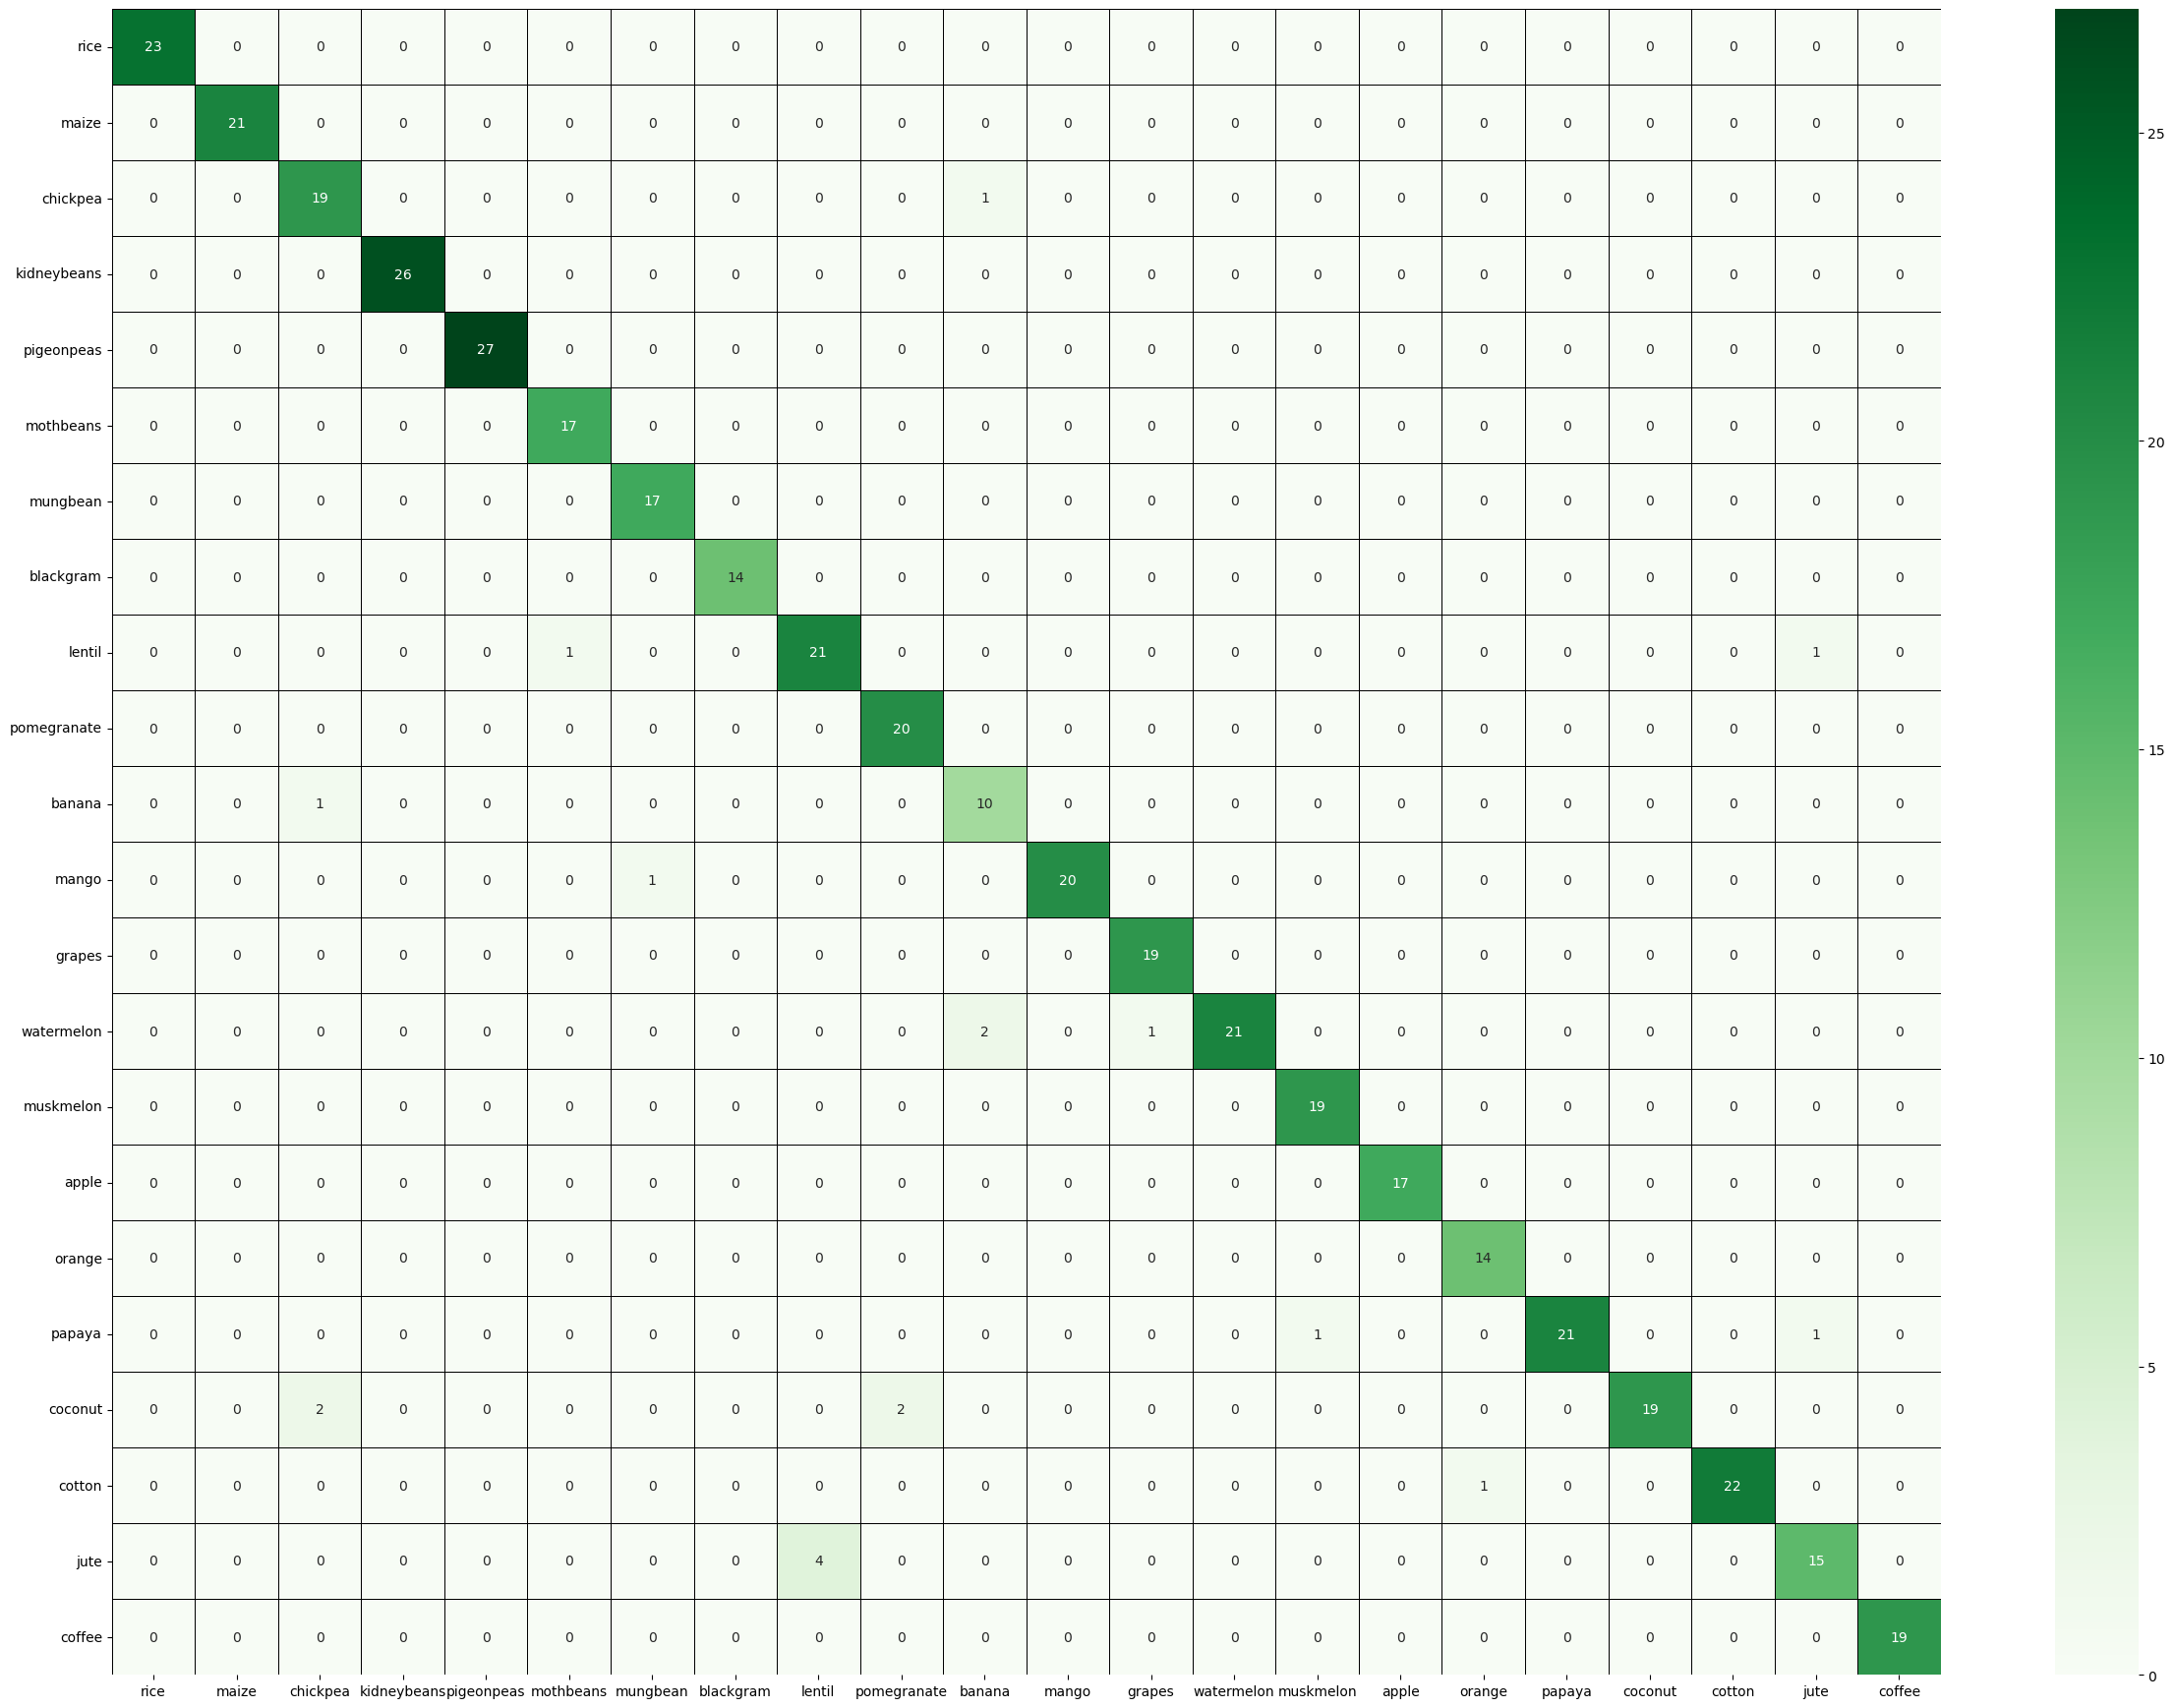

In [75]:

cm=confusion_matrix(ytest,ypred)
class_name=data['label'].unique().tolist()
plt.figure(figsize=(30,22))
sns.heatmap(cm,fmt='d',cmap='Greens',annot=True,xticklabels=class_name,yticklabels=class_name,linecolor="black",linewidths=0.7)
plt.xticks(rotation=0)
plt.show()

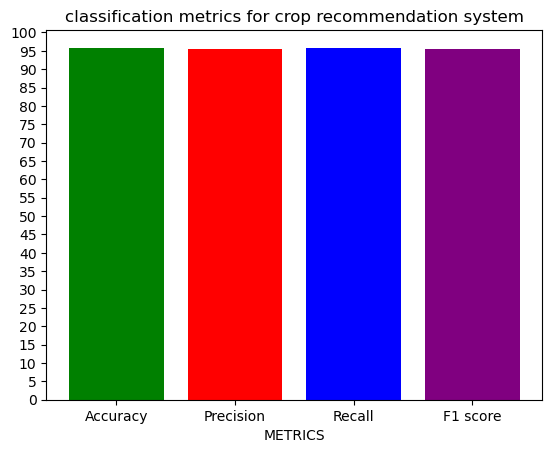

In [93]:
metrics=['Accuracy',"Precision","Recall",'F1 score']
scores=[accuracy_score(ytest,ypred)*100,precision_score(ytest,ypred,average='macro')*100,recall_score(ytest,ypred,average='macro')*100,f1_score(ytest,ypred,average='macro')*100]
plt.bar(metrics,scores,color=['green','red','blue','purple'])
plt.title("classification metrics for crop recommendation system")
plt.xlabel("METRICS")
plt.yticks(range(0,101,5))
plt.show()

In [38]:
joblib.dump(model,r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\MODELS\fnn.pkl")

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\CROP_RECOMMENDATION\\MODELS\\fnn.pkl']